## Initial data analysis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# pull data from github
bank_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter03/data/bank-additional/bank-additional-full.csv", sep=";")

# visualize the head of the dataset
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [0]:
# define numerical features
numerical_features = [col for col in bank_data.columns \
                      if np.issubdtype(bank_data[col].dtype, np.number)]
print(numerical_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [0]:
# print statistics about the different numerical columns
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


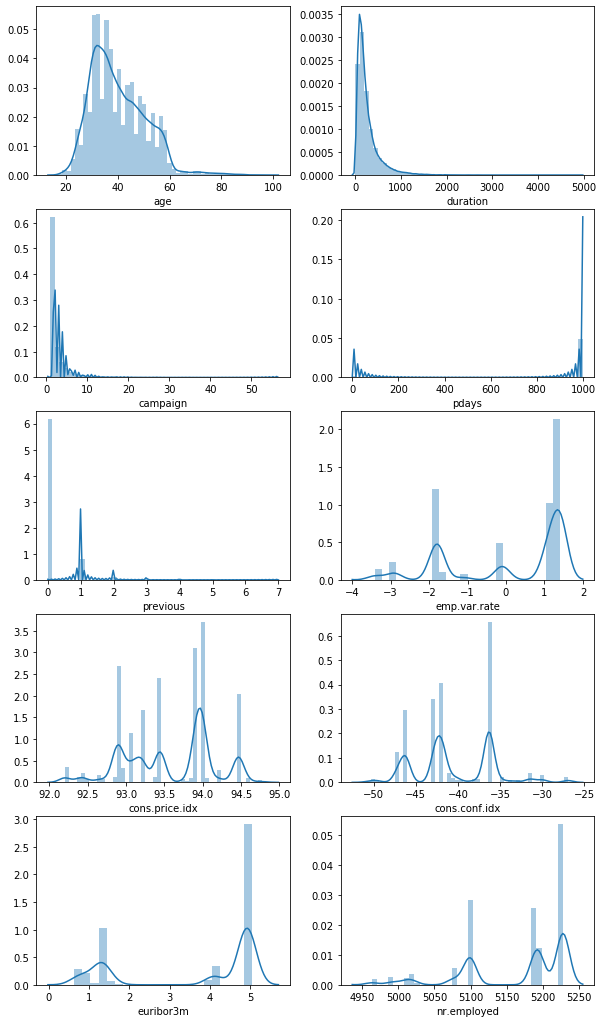

In [0]:
# plot distributions of numerical features
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.distplot(bank_data[col])
plt.savefig("figs/exercise_3_01_distributions.png", format="png", dpi=500)

In [0]:
# define categorical features
categorical_features = [col for col in bank_data.columns \
                      if pd.api.types.is_string_dtype(bank_data[col])]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


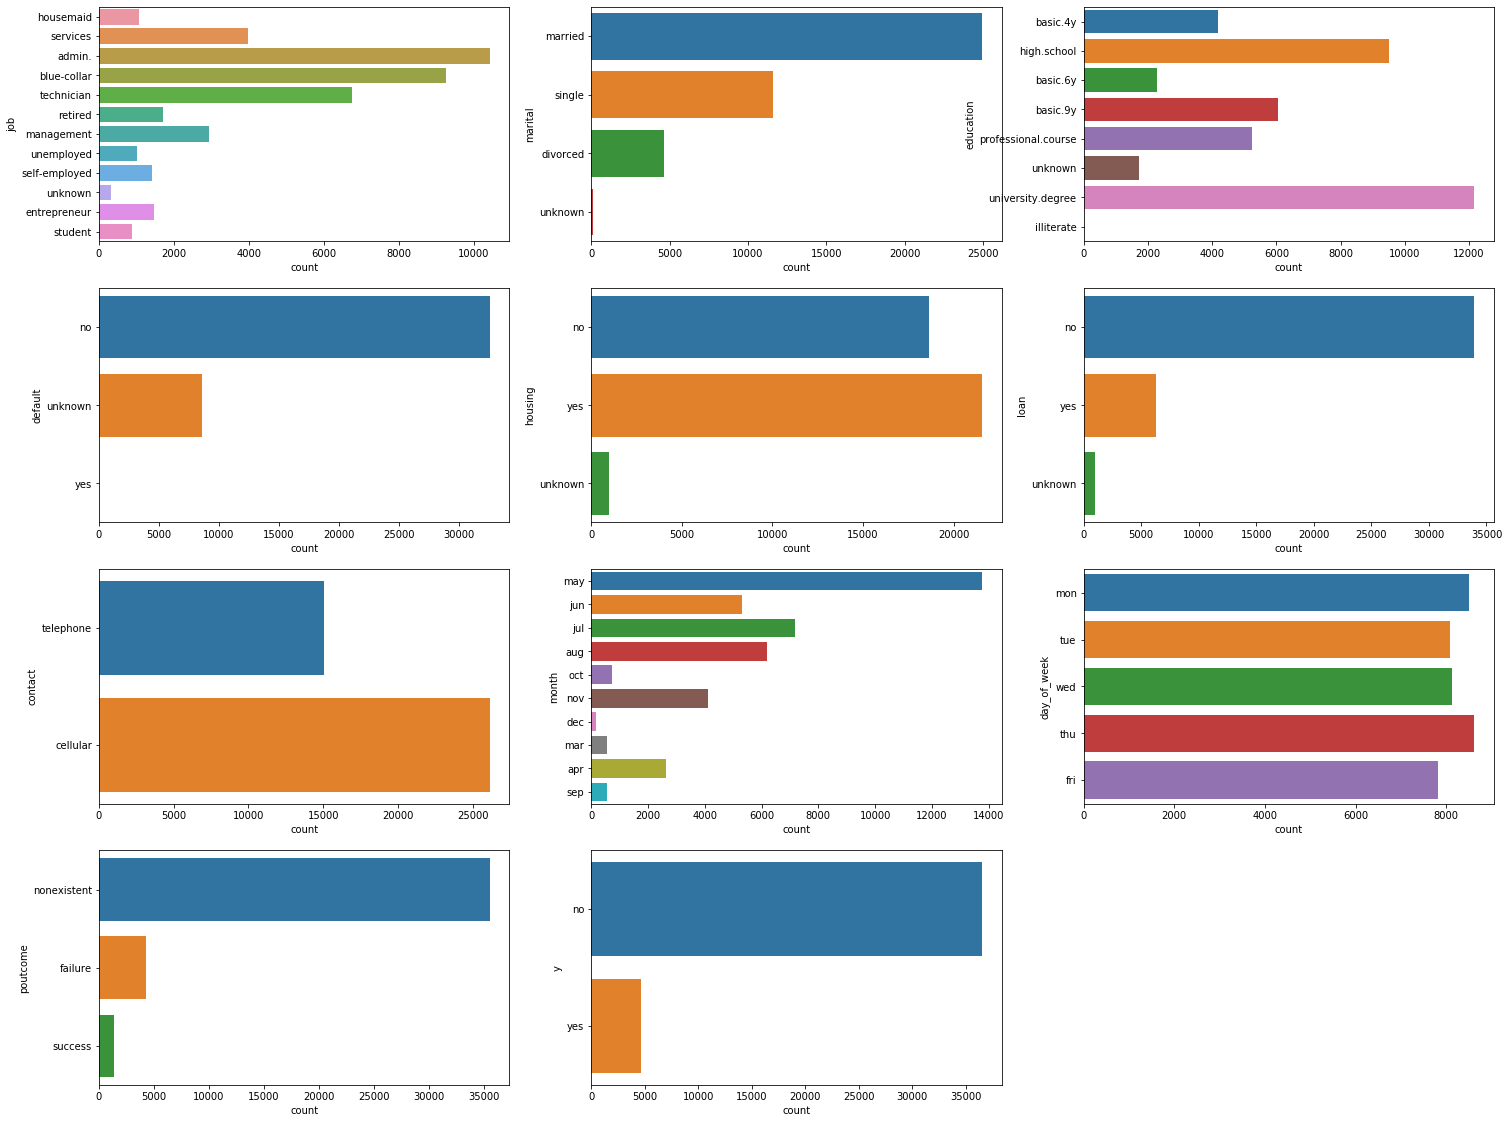

In [0]:
# plot distributions of numerical features
plt.figure(figsize=(25,35))
for index, col in enumerate(categorical_features):
    plt.subplot(6, 2, index+1)
    ax = sns.countplot(y=col, data=bank_data)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)

plt.savefig("figs/exercise_3_02_counts.png", format="png", dpi=500)

In [0]:
# compute number of entries in y column
print("Total number of entries:")
print(bank_data["y"].value_counts(ascending=True))
print()
print("Percentages:")
print(bank_data["y"].value_counts(normalize=True, ascending=True)*100)

Total number of entries:
yes     4640
no     36548
Name: y, dtype: int64

Percentages:
yes    11.265417
no     88.734583
Name: y, dtype: float64


## Impact of numerical features on outcome

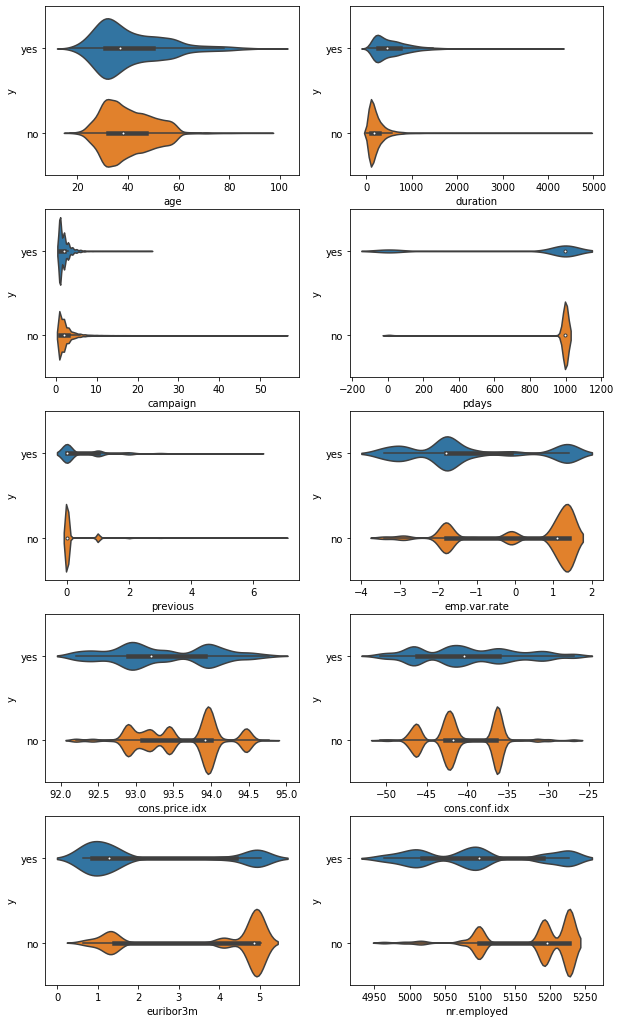

In [0]:
# create violin plots for successful and non-successful marketing campaigns
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.violinplot(x=col, y="y", data=bank_data, order=["yes", "no"])
plt.savefig("figs/violin_plots_numerical_features.png", format="png", dpi=500)

In [0]:
from scipy.stats import ttest_ind

# define function for computing mean of column for yes and no cases,
# as well as the test statistics and pvalue for equality of means test
def test_means(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()

    ttest_res = ttest_ind(values_yes, values_no)
    
    return [col, mean_yes, mean_no, \
            round(ttest_res[0], 4), round(ttest_res[1],4)]

    
# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "mean yes", \
    "mean no", "ttest stat", "ttest pval"])

# for each column in the numerical_features, compute means 
# and test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank_data, col)
    
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


In [0]:
from scipy.stats import ks_2samp

# define function which performs Kolmogorov-Smirnov test, 
# for provided column
def test_ks(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]

    kstest_res = ks_2samp(values_yes, values_no)
    
    return [col, round(kstest_res[0], 4), round(kstest_res[1],4)]

# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "ks stat", "ks pval"])

# for each column in the numerical_features, 
# compute test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(bank_data, col)
    
test_df

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


<Figure size 720x720 with 0 Axes>

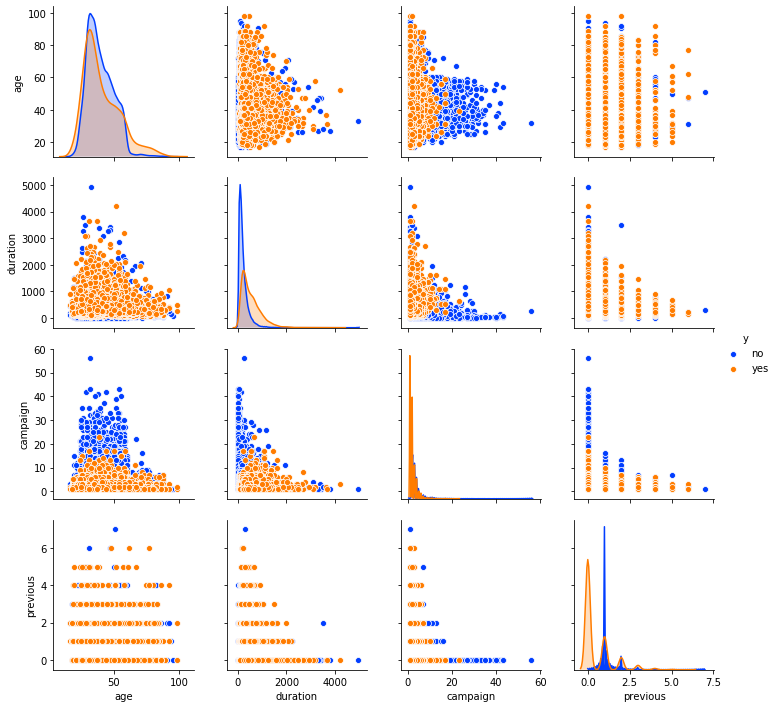

<Figure size 720x720 with 0 Axes>

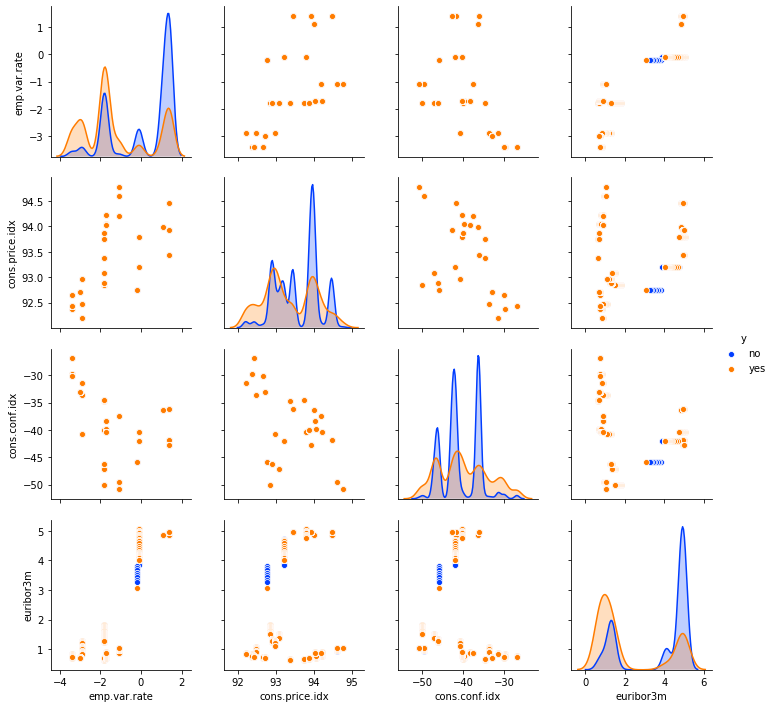

In [0]:
# create arrays containing cambaing and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", \
                     "cons.conf.idx", "euribor3m"]

# create pairplot between campaign columns
plot_data = bank_data[campaign_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig("figs/pairplot_campaign.png", format="png", dpi=300)

# create pairplot between financial features
plot_data = bank_data[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")
plt.savefig("figs/pairplot_financial.png", format="png", dpi=300)

In [0]:
# create mask for successful calls
successful_calls = bank_data.y == "yes"

# plot correlation matrix for successful calls
plot_data = bank_data[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1,-0.059,-0.0079,0.075,-0.082,-0.025,0.14,-0.085
duration,-0.059,1,0.16,-0.23,0.5,0.24,-0.14,0.5
campaign,-0.0079,0.16,1,-0.1,0.22,0.12,-0.043,0.21
previous,0.075,-0.23,-0.1,1,-0.28,0.091,0.13,-0.39
emp.var.rate,-0.082,0.5,0.22,-0.28,1,0.66,-0.27,0.93
cons.price.idx,-0.025,0.24,0.12,0.091,0.66,1,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.043,0.13,-0.27,-0.33,1,-0.12
euribor3m,-0.085,0.5,0.21,-0.39,0.93,0.41,-0.12,1


In [0]:
# plot correlation matrix for unsuccessful calls
plot_data = bank_data[campaign_columns + financial_columns][~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1,0.0008,0.0084,-0.003,0.027,0.011,0.12,0.041
duration,0.0008,1,-0.083,-0.0043,0.0035,0.018,0.0042,0.0065
campaign,0.0084,-0.083,1,-0.068,0.13,0.12,-0.0071,0.12
previous,-0.003,-0.0043,-0.068,1,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.027,0.0035,0.13,-0.42,1,0.8,0.32,0.98
cons.price.idx,0.011,0.018,0.12,-0.27,0.8,1,0.15,0.73
cons.conf.idx,0.12,0.0042,-0.0071,-0.14,0.32,0.15,1,0.39
euribor3m,0.041,0.0065,0.12,-0.44,0.98,0.73,0.39,1


In [0]:
# plot difference of successful - unsuccessful correlation matrices
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0,-0.06,-0.016,0.078,-0.11,-0.036,0.016,-0.13
duration,-0.06,0,0.24,-0.23,0.5,0.22,-0.15,0.49
campaign,-0.016,0.24,0,-0.036,0.089,-0.0068,-0.036,0.097
previous,0.078,-0.23,-0.036,0,0.14,0.36,0.27,0.05
emp.var.rate,-0.11,0.5,0.089,0.14,0,-0.14,-0.59,-0.05
cons.price.idx,-0.036,0.22,-0.0068,0.36,-0.14,0,-0.48,-0.32
cons.conf.idx,0.016,-0.15,-0.036,0.27,-0.59,-0.48,0,-0.51
euribor3m,-0.13,0.49,0.097,0.05,-0.05,-0.32,-0.51,0


## Run linear regression on financial columns

In [0]:
import statsmodels.api as sm

# create feature matrix and target variable
X = bank_data[["emp.var.rate", "cons.price.idx", "euribor3m"]]
X = sm.add_constant(X) # add constant value for the intercept term
y = bank_data["cons.conf.idx"]

# define and fit model
lineare_regression_model = sm.OLS(y, X)
result = lineare_regression_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          cons.conf.idx   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2960.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:28:51   Log-Likelihood:            -1.1753e+05
No. Observations:               41188   AIC:                         2.351e+05
Df Residuals:                   41184   BIC:                         2.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.4025      5.999    -13.

/Users/kosta/projects/packt-book/book-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Run logistic regression on campaign columns

/Users/kosta/projects/packt-book/book-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


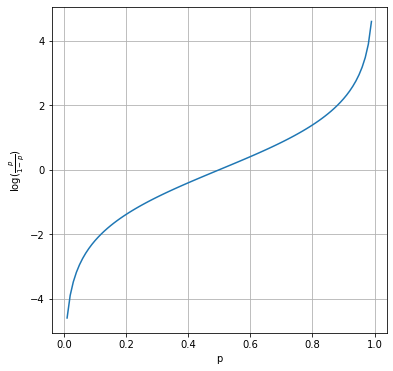

In [0]:
# plot logit function
x = np.arange(0.001, 1, 0.01)
logit = np.log(x/(1-x))

plt.figure(figsize=(6,6))
plt.plot(x,logit)
plt.xlabel("p")
plt.ylabel("$\log(\\frac{p}{1-p})$")
plt.grid()
plt.savefig("figs/logit_function.png", format="png", dpi=300)



In [0]:
# create feature matrix and target variable
X = bank_data[["age", "duration", "campaign", "previous"]]
X = sm.add_constant(X) # add constant value for the intercept term
y = np.where(bank_data["y"] == "yes", 1, 0) # target has to be numeric

# define and fit model
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.269969
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41183
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                  0.2331
Time:                        17:19:35   Log-Likelihood:                -11119.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7793      0.076    -49.435      0.000      -3.929      -3.629
age            0.0091      0.

/Users/kosta/projects/packt-book/book-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# example of one hot encoding
print(bank_data["education"].unique())

hot_encoded = pd.get_dummies(bank_data["education"])
hot_encoded["education"] = bank_data["education"]
hot_encoded.head(10)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,education
0,1,0,0,0,0,0,0,0,basic.4y
1,0,0,0,1,0,0,0,0,high.school
2,0,0,0,1,0,0,0,0,high.school
3,0,1,0,0,0,0,0,0,basic.6y
4,0,0,0,1,0,0,0,0,high.school
5,0,0,1,0,0,0,0,0,basic.9y
6,0,0,0,0,0,1,0,0,professional.course
7,0,0,0,0,0,0,0,1,unknown
8,0,0,0,0,0,1,0,0,professional.course
9,0,0,0,1,0,0,0,0,high.school


## Exercise 3.04: Logistic regression on the full marketing campaign data

In [0]:
# transform all features into numerical ones, by using 
# the get_dummies() function
X = bank_data.drop("y", axis=1)
X = pd.get_dummies(X)
X = sm.add_constant(X)
print(X.columns)

Index(['const', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 

/Users/kosta/projects/packt-book/book-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# extract and transform target variable
y = np.where(bank_data["y"] == "yes", 1 ,0)

In [0]:
# define and fit model
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())




         Current function value: 0.207316
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41135
Method:                           MLE   Df Model:                           52
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.4111
Time:                        17:31:02   Log-Likelihood:                -8538.9
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -68.6994        nan        nan        nan         nan         nan
age    

/Users/kosta/projects/packt-book/book-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
